# PROJECT : MOVIE DATASET

This is mainly a VISUALIZATION and also a Content Based Recommendation project.In this project there will be several visualization with respect to different condition.The content based part is built of various content based tecnique.

In [85]:
#importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel
#from plotly.offline import init_notebook_mode, plot, iplot
#import plotly.graph_objs as go
#import plotly.plotly as py
#from wordcloud import WordCloud , STOPWORDS

In [174]:
dataset1 = pd.read_csv('tmdb_5000_credits.csv')
dataset2 = pd.read_csv('tmdb_5000_movies.csv')

In [175]:
dataset3 = pd.read_csv('AllMoviesDetailsCleaned.csv' , sep = ';');

In [176]:
dataset1.shape

(4803, 4)

In [177]:
dataset2.shape

(4803, 20)

In [178]:
dataset1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [179]:
dataset2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [180]:
dataset3.columns

Index(['id', 'budget', 'genres', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'production_companies_number',
       'production_countries_number', 'spoken_languages_number'],
      dtype='object')

In [182]:
dataset1 = dataset1.rename(index = str , columns = {'movie_id' : 'id'})

In [183]:
new_dataset1 = dataset2.merge(dataset1 , on = 'id')

In [185]:
dataset3 = dataset3[['id' , 'genres']]

In [187]:
dataset3.shape

(329044, 2)

In [188]:
new_dataset = new_dataset1.merge(dataset3 , on = 'id')

In [189]:
new_dataset.shape

(4777, 24)

In [190]:
new_dataset.isnull().sum()

budget                     0
genres_x                   0
homepage                3076
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  842
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
genres_y                  27
dtype: int64

In [191]:
new_dataset.head()

,budget,genres_x,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,genres_y
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Action|Adventure|Fantasy|Science Fiction
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Adventure|Fantasy|Action
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Action|Adventure|Crime
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Action|Crime|Drama|Thriller
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Action|Adventure|Science Fiction


In [192]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4777 entries, 0 to 4776
Data columns (total 24 columns):
budget                  4777 non-null int64
genres_x                4777 non-null object
homepage                1701 non-null object
id                      4777 non-null int64
keywords                4777 non-null object
original_language       4777 non-null object
original_title          4777 non-null object
overview                4774 non-null object
popularity              4777 non-null float64
production_companies    4777 non-null object
production_countries    4777 non-null object
release_date            4776 non-null object
revenue                 4777 non-null int64
runtime                 4775 non-null float64
spoken_languages        4777 non-null object
status                  4777 non-null object
tagline                 3935 non-null object
title_x                 4777 non-null object
vote_average            4777 non-null float64
vote_count              4777 non-null 

In [193]:
new_dataset.fillna(0)

,budget,genres_x,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,genres_y
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Action|Adventure|Fantasy|Science Fiction
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Adventure|Fantasy|Action
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Action|Adventure|Crime
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Action|Crime|Drama|Thriller
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Action|Adventure|Science Fiction
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de...",Fantasy|Action|Adventure
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 

In [194]:
new_dataset.isnull().sum()

budget                     0
genres_x                   0
homepage                3076
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  842
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
genres_y                  27
dtype: int64

### Data Cleaning

In [195]:
new_dataset.shape

(4777, 24)

In [196]:
#Remove Duplicates rows
new_dataset.drop_duplicates(inplace = True)
print("Afetr Removing Duplicate Values (Rows,Columns) : ",new_dataset.shape)

Afetr Removing Duplicate Values (Rows,Columns) :  (4777, 24)


In [197]:
new_dataset['release_date'] = pd.to_datetime(new_dataset['release_date'])
new_dataset['release_date'].head()

0   2009-12-10
1   2007-05-19
2   2015-10-26
3   2012-07-16
4   2012-03-07
Name: release_date, dtype: datetime64[ns]

In [198]:
new_dataset.head()

,budget,genres_x,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,genres_y
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Action|Adventure|Fantasy|Science Fiction
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Adventure|Fantasy|Action
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Action|Adventure|Crime
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Action|Crime|Drama|Thriller
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Action|Adventure|Science Fiction


In [199]:
# Make new column YEAR
new_dataset['year'] = pd.DatetimeIndex(new_dataset['release_date']).year
new_dataset['year'].head()

0    2009.0
1    2007.0
2    2015.0
3    2012.0
4    2012.0
Name: year, dtype: float64

In [200]:
new_dataset.head(3)

,budget,genres_x,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,genres_y,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Action|Adventure|Fantasy|Science Fiction,2009.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Adventure|Fantasy|Action,2007.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Action|Adventure|Crime,2015.0


In [201]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4777 entries, 0 to 4776
Data columns (total 25 columns):
budget                  4777 non-null int64
genres_x                4777 non-null object
homepage                1701 non-null object
id                      4777 non-null int64
keywords                4777 non-null object
original_language       4777 non-null object
original_title          4777 non-null object
overview                4774 non-null object
popularity              4777 non-null float64
production_companies    4777 non-null object
production_countries    4777 non-null object
release_date            4776 non-null datetime64[ns]
revenue                 4777 non-null int64
runtime                 4775 non-null float64
spoken_languages        4777 non-null object
status                  4777 non-null object
tagline                 3935 non-null object
title_x                 4777 non-null object
vote_average            4777 non-null float64
vote_count              4777 n

In [202]:
new_dataset.columns

Index(['budget', 'genres_x', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew', 'genres_y', 'year'],
      dtype='object')

In [203]:
# Remove some COLUMNS
dataset = new_dataset

dataset.drop(['production_countries' , 'title_x' , 'title_y' , 'homepage' , 'status' , 'genres_x' , 'tagline'] , axis = 1 , inplace = True)
print("Afetr Removing Unused Columns (Rows,Columns) : ",new_dataset.shape)

Afetr Removing Unused Columns (Rows,Columns) :  (4777, 18)


In [204]:
# Checking for an zero values in the budget and revenue columns
print("Rows With Zero Values In The Budget Column:",dataset[(dataset['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",dataset[(dataset['revenue']==0)].shape[0])

Rows With Zero Values In The Budget Column: 1030
Rows With Zero Values In The Revenue Column: 1420


## Exploratory Data Analysis

Now,from the dataset visualize with different conditions.

### Which year has the highest release of movies

To visualize this condition we need to count the each unique id with respect to their year.Then merge them according their release year. 

In [205]:
dataset['year'].value_counts()

2009.0    247
2006.0    237
2014.0    232
2008.0    227
2013.0    226
2010.0    225
2011.0    223
2005.0    217
2015.0    215
2004.0    203
2002.0    202
2012.0    197
2007.0    195
2001.0    183
1999.0    171
2003.0    169
2000.0    166
1998.0    133
1997.0    112
2016.0    104
1996.0     97
1995.0     70
1994.0     55
1993.0     47
1992.0     34
1981.0     33
1987.0     31
1989.0     31
1988.0     31
1991.0     30
         ... 
1954.0      4
1946.0      3
1948.0      3
1951.0      3
1947.0      3
1960.0      3
1956.0      3
1959.0      3
1939.0      3
1936.0      2
1957.0      2
1929.0      2
1938.0      2
1937.0      2
1955.0      2
1944.0      2
1933.0      2
1942.0      2
1949.0      2
1932.0      1
1941.0      1
1925.0      1
1934.0      1
1930.0      1
1950.0      1
1916.0      1
2017.0      1
1958.0      1
1935.0      1
1927.0      1
Name: year, Length: 90, dtype: int64

In [206]:
np.unique(dataset['year'])

array([1916., 1925., 1927., 1929., 1930., 1932., 1933., 1934., 1935.,
       1936., 1937., 1938., 1939., 1940., 1941., 1942., 1944., 1945.,
       1946., 1947., 1948., 1949., 1950., 1951., 1952., 1953., 1954.,
       1955., 1956., 1957., 1958., 1959., 1960., 1961., 1962., 1963.,
       1964., 1965., 1966., 1967., 1968., 1969., 1970., 1971., 1972.,
       1973., 1974., 1975., 1976., 1977., 1978., 1979., 1980., 1981.,
       1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990.,
       1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
       2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
         nan])

In [113]:
# make group for each year and count the number of movies in each year 
data = dataset.groupby('year').count()['id']
dataset.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015.0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012.0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012.0


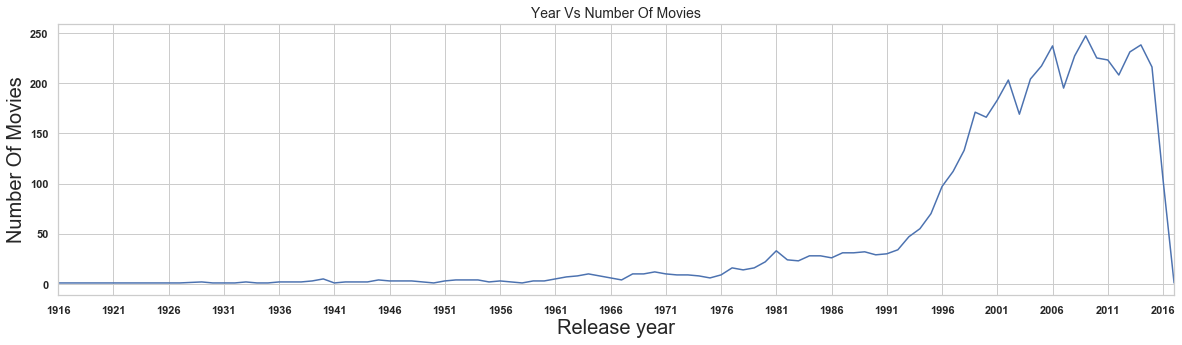

In [115]:
#make group of the data according to their release year and count the total number of movies in each year and pot.
dataset.groupby('year').count()['id'].plot(xticks  = np.arange(1916 , 2017 , 5))


# Plot on grpah
sns.set(rc = {'figure.figsize':(20 , 10)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 20)
plt.ylabel('Number Of Movies',fontsize = 20)
#set the style sheet
sns.set_style("whitegrid")

#### 2008 year has the highest release of movies 250(it is mainly based on the observation of the dataset).

### Which Movie Has The Highest Or Lowest Profit

In [116]:
#calculate Profit for each of the movie
#add a new column in the dataframe name 'Profit'
dataset['profit'] = dataset['revenue'] - dataset['budget']

In [117]:
dataset['profit'].head(20)

0     2550965087
1      661000000
2      635674609
3      834939099
4       24139100
5      632871626
6      331794936
7     1125403694
8      683959197
9      623260194
10     121081192
11     386090727
12     865659812
13    -165710090
14     437845518
15     194651413
16    1299557910
17     665713802
18     399026776
19     706019788
Name: profit, dtype: int64

In [118]:
#use the function 'idmin' to find the index of lowest profit movie.
#use the function 'idmax' to find the index of Highest profit movie.
def find_max(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = dataset[x].idxmin()
    
    #use the function 'idmax' to find the index of lowest profit movie.
    high_index = dataset[x].idxmax()
    
    high = pd.DataFrame(dataset.loc[high_index , :])
    low = pd.DataFrame(dataset.loc[min_index , :])
    
    print("Movie Which Has Highest "+ x + " : ",dataset['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",dataset['original_title'][min_index])
    
    return pd.concat([high , low] , axis = 1)

In [119]:
find_max('profit')

Movie Which Has Highest profit :  Avatar
Movie Which Has Lowest profit  :  The Lone Ranger


,0,13
budget,237000000,255000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
id,19995,57201
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 1556, ""name"": ""texas""}, {""id"": 2673, ""..."
original_language,en,en
original_title,Avatar,The Lone Ranger
overview,"In the 22nd century, a paraplegic Marine is di...",The Texas Rangers chase down a gang of outlaws...
popularity,150.438,49.047
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""..."
release_date,2009-12-10 00:00:00,2013-07-03 00:00:00


In [120]:
# make a plot which contain top 10 movies which earn highest profit.
info = pd.DataFrame(dataset['profit'].sort_values(ascending = False))
info['original_title'] = dataset['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['profit'][:10])

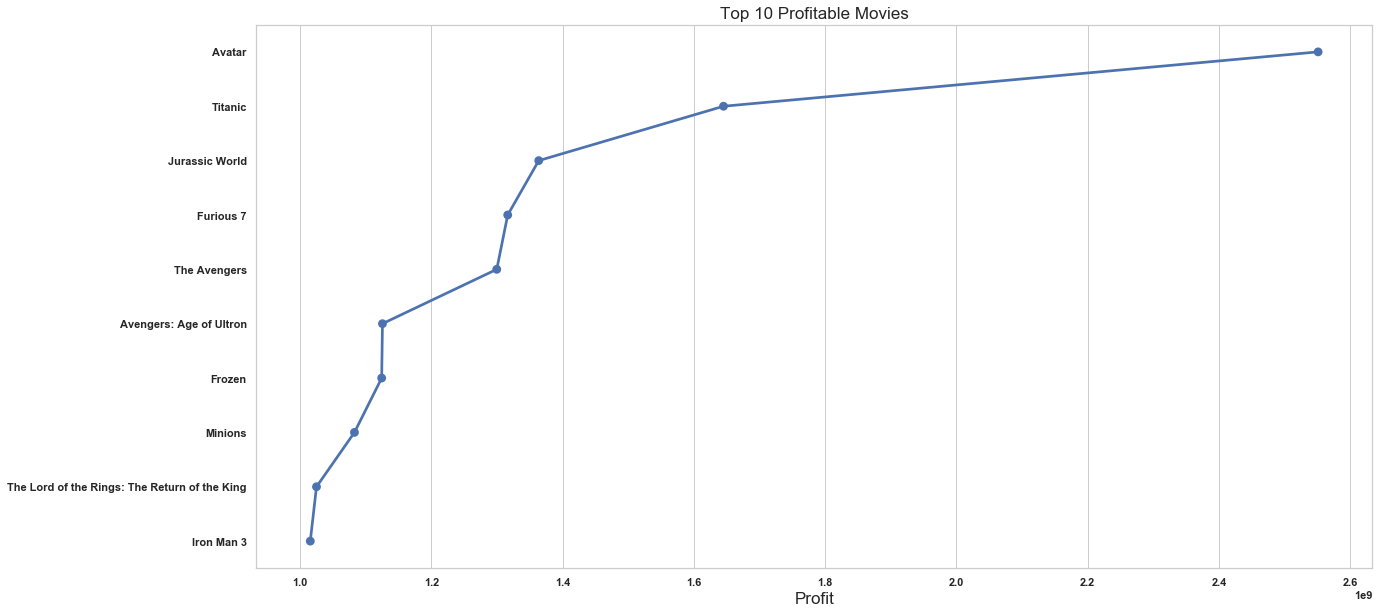

In [121]:
#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 17)
ax.set_xlabel("Profit",fontsize = 17)
sns.set_style("darkgrid")

###### We can see from the above graph that AVATAR is the highest grossing movie till 2016.

### Movie with Highest And Lowest Budget

In [122]:
# change the zero into NAN in budget column.            
dataset['budget'] = dataset['budget'].replace(0 , np.NAN)
find_max('budget')

Movie Which Has Highest budget :  Pirates of the Caribbean: On Stranger Tides
Movie Which Has Lowest budget  :  Modern Times


,17,4238
budget,3.8e+08,1
genres,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name..."
id,1865,3082
keywords,"[{""id"": 658, ""name"": ""sea""}, {""id"": 1316, ""nam...","[{""id"": 1382, ""name"": ""factory""}, {""id"": 1546,..."
original_language,en,en
original_title,Pirates of the Caribbean: On Stranger Tides,Modern Times
overview,Captain Jack Sparrow crosses paths with a woma...,The Tramp struggles to live in modern industri...
popularity,135.414,28.2765
production_companies,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""United Artists"", ""id"": 60}, {""name""..."
release_date,2011-05-14 00:00:00,1936-02-05 00:00:00


In [123]:
#make a plot which contain top 10 highest budget movies.
info = pd.DataFrame(dataset['budget'].sort_values(ascending = False))
info['original_title'] = dataset['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

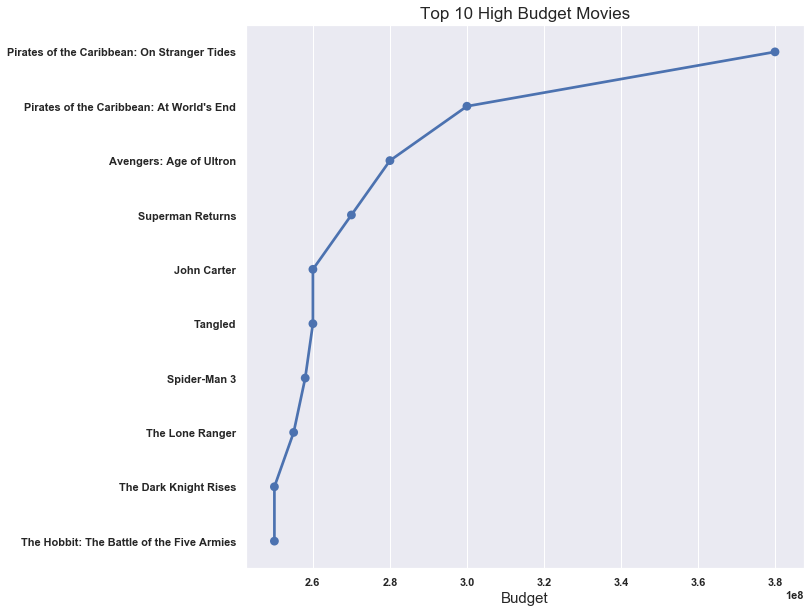

In [126]:
#plot the figure and setup the title and labels.
ax = sns.pointplot(x = y , y = x)
sns.set(rc={'figure.figsize':(10,10)})
ax.set_title("Top 10 High Budget Movies",fontsize = 17)
ax.set_xlabel("Budget",fontsize = 15)
sns.set_style("darkgrid")

### Movie with Highest And Lowest Earned Revenue

In [127]:
#use 'find_minmax' function which i made earlier
find_max('revenue')

Movie Which Has Highest revenue :  Avatar
Movie Which Has Lowest revenue  :  The Lovers


,0,83
budget,2.37e+08,2.7e+07
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
id,19995,79698
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",[]
original_language,en,en
original_title,Avatar,The Lovers
overview,"In the 22nd century, a paraplegic Marine is di...",The Lovers is an epic romance time travel adve...
popularity,150.438,2.41853
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli..."
release_date,2009-12-10 00:00:00,2015-02-13 00:00:00


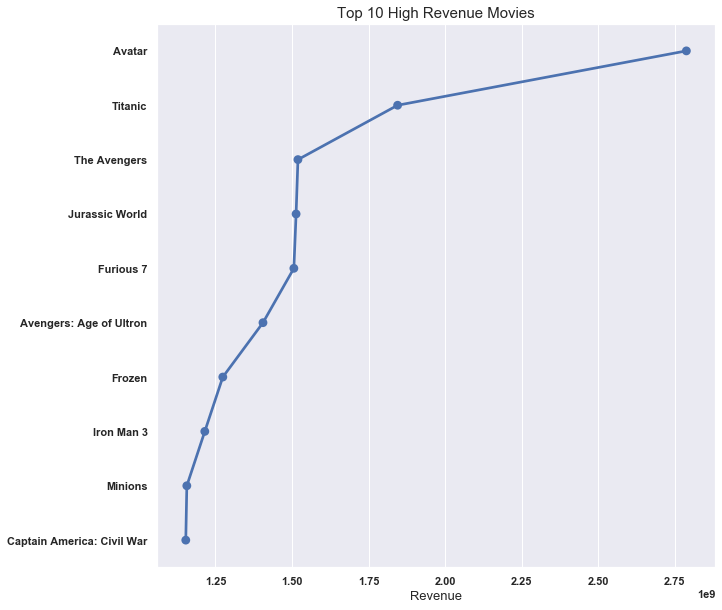

In [128]:
#plot the highest revenue movie by ascending order
info = pd.DataFrame(dataset['revenue'].sort_values(ascending = False))
info['original_title'] = dataset['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 movies with high revenue data from the list and dataframe.
x = list(data[:10])
y = list(info['revenue'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Revenue Movies",fontsize = 15)
ax.set_xlabel("Revenue",fontsize = 13)
sns.set_style("darkgrid")

### Movie with Longest And Shortest Rintime

In [129]:
dataset['runtime'] = dataset['runtime'].replace(0,np.NAN)
find_max('runtime')

Movie Which Has Highest runtime :  Carlos
Movie Which Has Lowest runtime  :  Vessel


,2384,4466
budget,1.8e+07,NaN
genres,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...","[{""id"": 27, ""name"": ""Horror""}, {""id"": 878, ""na..."
id,43434,211557
keywords,"[{""id"": 1419, ""name"": ""gun""}, {""id"": 7336, ""na...",[]
original_language,en,en
original_title,Carlos,Vessel
overview,"The story of Venezuelan revolutionary, Ilich R...",Vessel is the story of the passengers of Fligh...
popularity,1.13838,0.322553
production_companies,"[{""name"": ""Egoli Tossell Film AG"", ""id"": 2254}...","[{""name"": ""Baker's Dozen Productions"", ""id"": 5..."
release_date,2010-05-19 00:00:00,2012-10-28 00:00:00


The first column shows the runtime of the highest and second the lowest with column names as the index number.

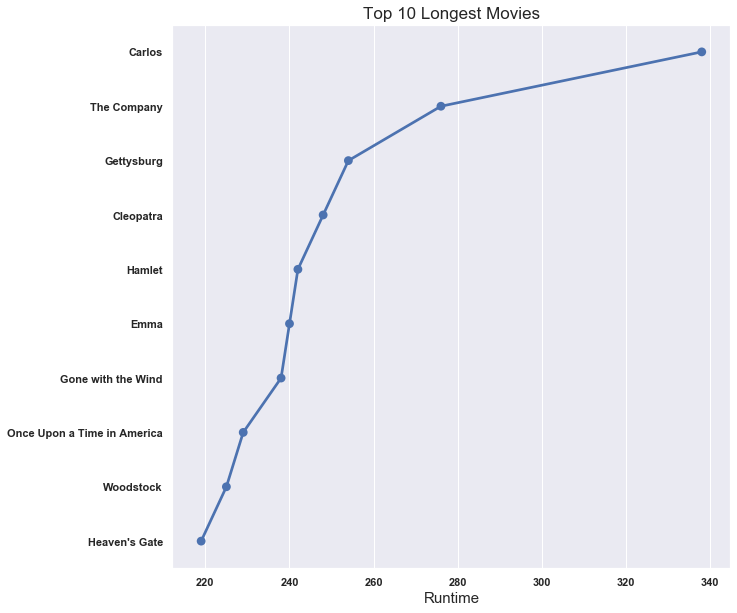

In [131]:
info = pd.DataFrame(dataset['runtime'].sort_values(ascending = False))
info['original_title'] = dataset['original_title']
data = list(map(str,(info['original_title'])))


x = list(data[:10])
y = list(info['runtime'][:10])


#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,10)})
ax.set_title("Top 10 Longest Movies",fontsize = 17)
ax.set_xlabel("Runtime",fontsize = 15)
sns.set_style("darkgrid")

### Movie with Highest And Lowest Votes

In [132]:
#find the vote average
find_max('vote_average')

Movie Which Has Highest vote_average :  Stiff Upper Lips
Movie Which Has Lowest vote_average  :  Black Water Transit


,3519,1464
budget,NaN,NaN
genres,"[{""id"": 35, ""name"": ""Comedy""}]","[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name..."
id,89861,310706
keywords,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",[]
original_language,en,en
original_title,Stiff Upper Lips,Black Water Transit
overview,Stiff Upper Lips is a broad parody of British ...,In this action thriller set in post-Katrina Ne...
popularity,0.356495,0.126738
production_companies,[],"[{""name"": ""Capitol Films"", ""id"": 826}]"
release_date,1998-06-12 00:00:00,2009-05-13 00:00:00


In [133]:
info = pd.DataFrame(dataset['runtime'].sort_values(ascending = False))
info['original_title'] = dataset['original_title']
data = list(map(str,(info['original_title'])))


x = list(data[:10])
y = list(info['runtime'][:10])

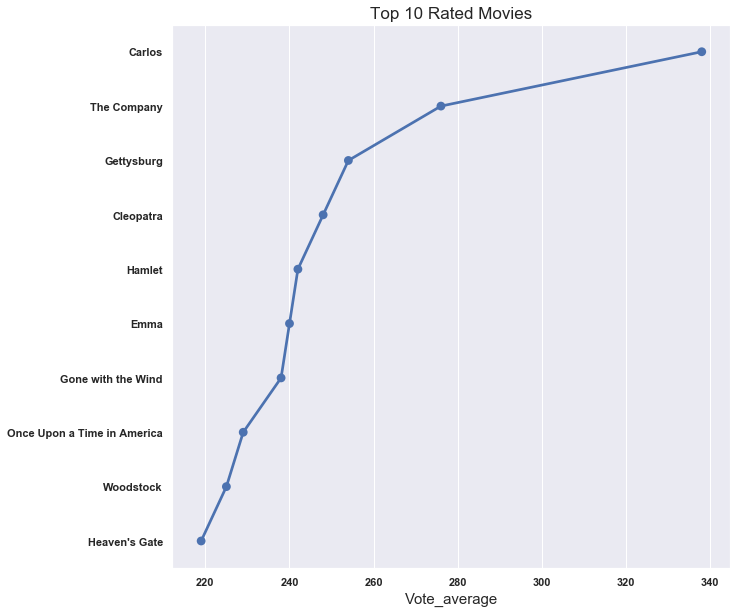

In [134]:
#make the point plot and setup the title and labels.
ax = sns.pointplot(x = y , y = x)
sns.set(rc={'figure.figsize':(10,10)})
ax.set_title("Top 10 Rated Movies",fontsize = 17)
ax.set_xlabel("Vote_average",fontsize = 15)
sns.set_style("darkgrid")

### Which Year Has The Highest Profit Rate

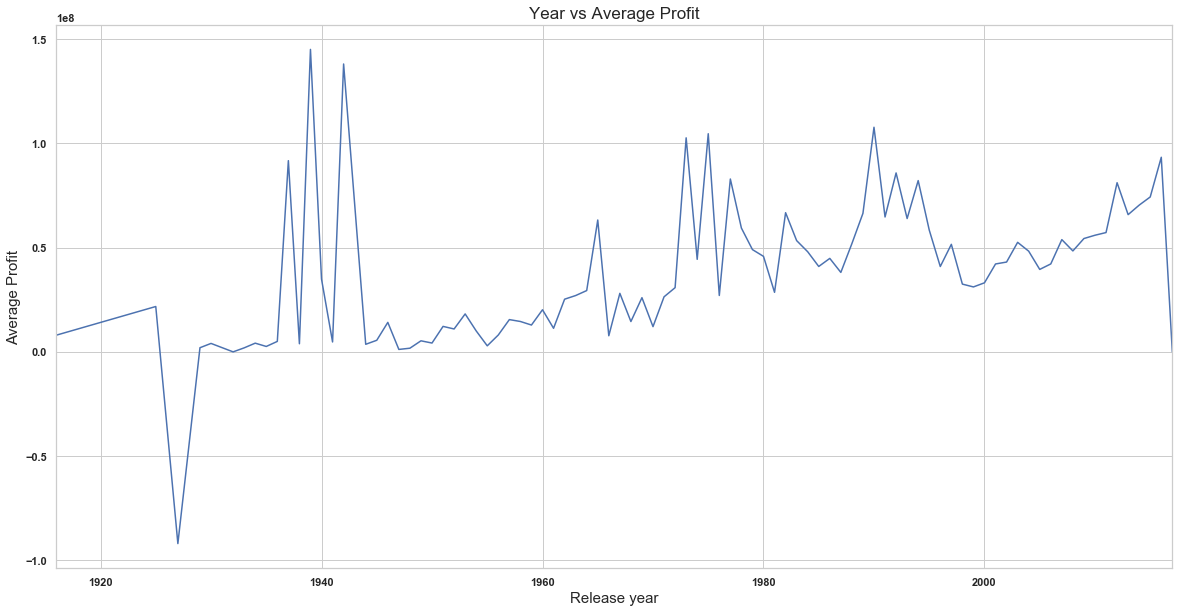

In [137]:
#do year-wise analysis of profit earn by movies in each earn.
#take the average of profit made by movies in each year and plot.

dataset.groupby('year')['profit'].mean().plot()

plt.title('Year vs Average Profit' , fontsize = 17)
plt.xlabel('Release year' , fontsize = 15)
plt.ylabel('Average Profit' , fontsize = 15)

sns.set(rc={'figure.figsize':(20 , 12)})
sns.set_style("whitegrid")

### Which length movies most liked by the audiences according to their popularity

In [138]:
dataset['runtime'] = dataset['runtime'].replace(np.NAN , 0)
dataset.isnull().sum()

budget                  1037
genres                     0
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
release_date               1
revenue                    0
runtime                    0
spoken_languages           0
tagline                  844
vote_average               0
vote_count                 0
cast                       0
crew                       0
year                       1
profit                     0
dtype: int64

In [207]:
dataset.head()

,budget,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,cast,crew,genres_y,year
0,237000000,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Action|Adventure|Fantasy|Science Fiction,2009.0
1,300000000,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Adventure|Fantasy|Action,2007.0
2,245000000,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Action|Adventure|Crime,2015.0
3,250000000,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Action|Crime|Drama|Thriller,2012.0
4,260000000,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Action|Adventure|Science Fiction,2012.0


C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Correlation Between Revenue And Budget :  0.7053993306781345


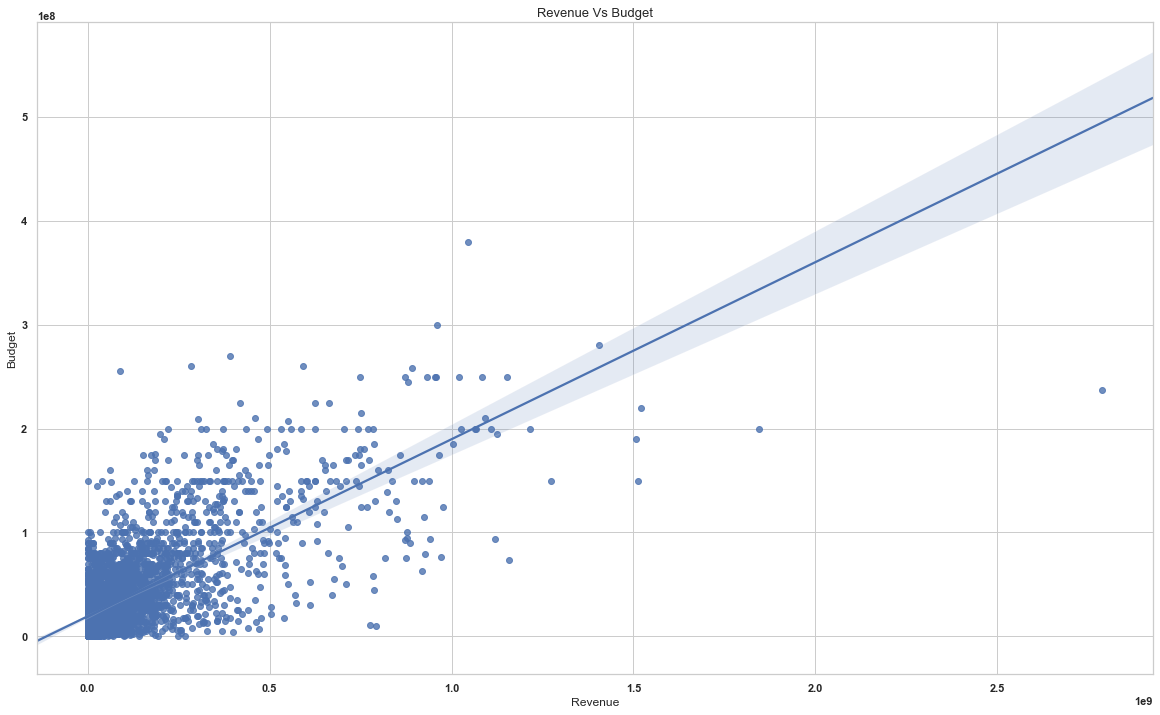

In [140]:
#how does revenue change according to their budget.
#make a scatter plot using 'regplot' between ''revenue' and 'budget'.
ax = sns.regplot(x = dataset['revenue'], y = dataset['budget'])

#set the title and labels of the figure
ax.set_title("Revenue Vs Budget",fontsize=13)
ax.set_xlabel("Revenue",fontsize=12)
ax.set_ylabel("Budget",fontsize=12)
#set the figure size
sns.set(rc={'figure.figsize':(10 , 10)})
sns.set_style("whitegrid")

#find the correlation between them
#change zero into NAN in budget and revenue column for the exact calculation.
dataset['budget'] = dataset['budget'].replace(0,np.NAN)
dataset['revenue'] = dataset['revenue'].replace(0,np.NAN)
dataset['profit'] = dataset['profit'].replace(0,np.NAN)

#find the correlation using 'corr()' function.
#it returns a dataframe which contain the correlation between all the numeric columns.
data_corr = dataset.corr()
print("Correlation Between Revenue And Budget : ",data_corr.loc['revenue','budget'])

Correlation Between Revenue And Budget :  0.5548541953796063


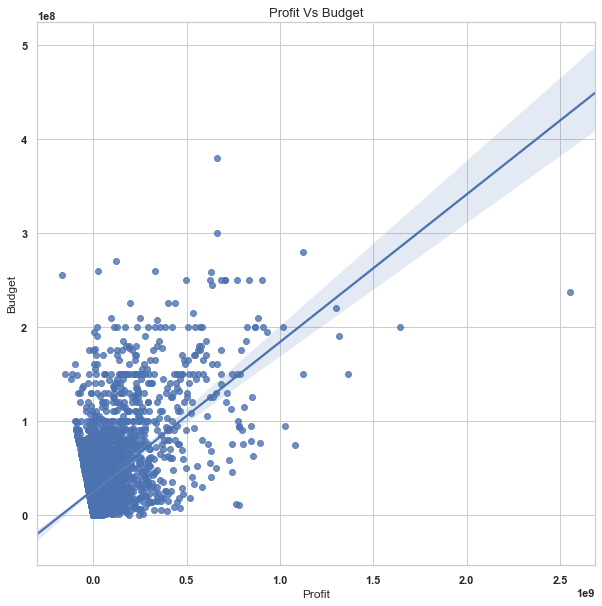

In [141]:
ax = sns.regplot(x = dataset['profit'], y = dataset['budget'])

#set the title and labels of the figure
ax.set_title("Profit Vs Budget",fontsize=13)
ax.set_xlabel("Profit",fontsize=12)
ax.set_ylabel("Budget",fontsize=12)
#set the figure size
sns.set(rc={'figure.figsize':(10 , 10)})
sns.set_style("whitegrid")

#find the correlation between them
#change zero into NAN in budget and revenue column for the exact calculation.
dataset['budget'] = dataset['budget'].replace(0,np.NAN)
dataset['revenue'] = dataset['revenue'].replace(0,np.NAN)
dataset['profit'] = dataset['profit'].replace(0,np.NAN)

#find the correlation using 'corr()' function.
#it returns a dataframe which contain the correlation between all the numeric columns.
data_corr = dataset.corr()
print("Correlation Between Revenue And Budget : ",data_corr.loc['profit','budget'])

Correlation Between Revenue And Budget :  -0.19849870281082044


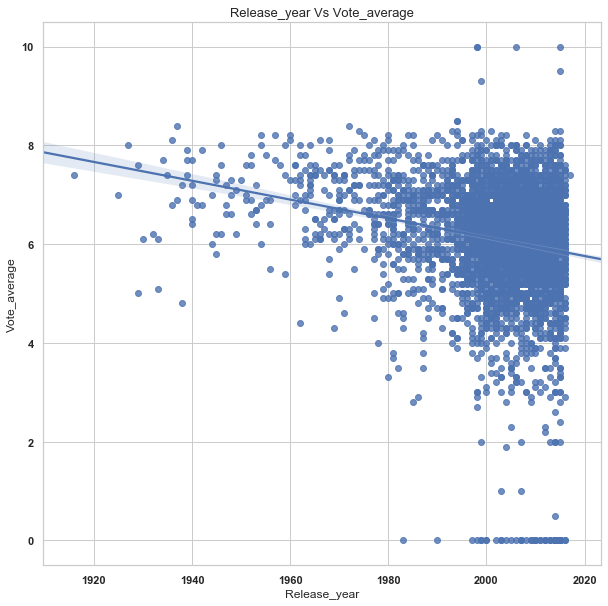

In [144]:
ax = sns.regplot(x = dataset['year'], y = dataset['vote_average'])

#set the title and labels of the figure
ax.set_title("Release_year Vs Vote_average",fontsize=13)
ax.set_xlabel("Release_year",fontsize=12)
ax.set_ylabel("Vote_average",fontsize=12)
#set the figure size
sns.set(rc={'figure.figsize':(10 , 10)})
sns.set_style("whitegrid")


#find the correlation using 'corr()' function.
#it returns a dataframe which contain the correlation between all the numeric columns.
data_corr = dataset.corr()
print("Correlation Between Revenue And Budget : ",data_corr.loc['year','vote_average'])

These Are Estimated Values They Can Be Differ.

1. Budget vs Revenue : Budget and revenue both have positive correlation(0.68) between them. Means there is a good possibility that movies with higher investments result in better revenues.
2. Profit Vs Budget : Profit And Budget both have positive correlation(0.53) between them. Means there is a good possibility that movies with higher investments result in better Profit.
3. Release Year Vs Vote Average : Release year and vote Average have negative correlation(-0.11). Means that movie ratings(vote average) does not depends on the release year.

### Highest release movies based on Month

In [145]:
#extract the month number from the release date
month_release = dataset['release_date'].dt.month

number_of_release = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months

#change the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

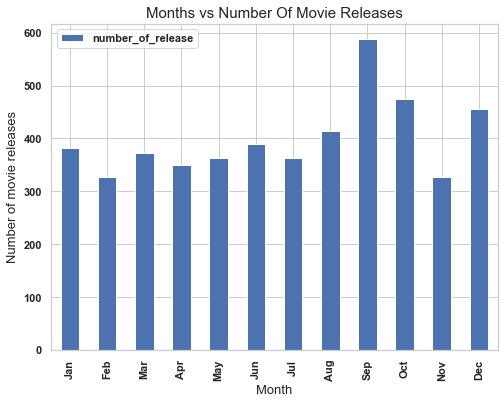

In [146]:
#plot the bar graph using plot.
number_of_release.plot(x = 'month' , kind = 'bar' , fontsize = 11,figsize=(8,6))

#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)
sns.set_style("darkgrid")

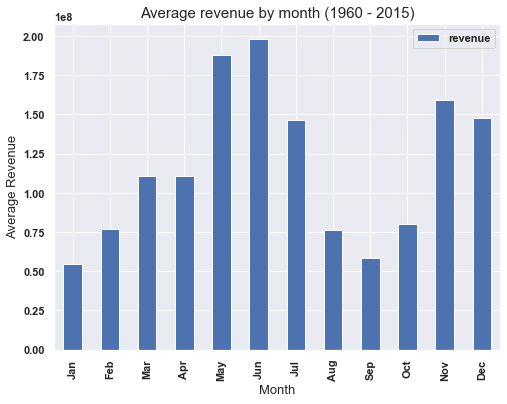

In [147]:
#which month made the highest average revenue?.
#make a dataframe with in which store the release month of each movie.
month_release = pd.DataFrame(month_release)

#change the column name of the new dataframe 'month_release'.
month_release.rename(columns = {'release_date':'release_month'},inplace=True)

#add a new column 'revenue' in the dataframe 'month_release'.
month_release['revenue'] = dataset['revenue']

#make the group of the data according to their month and calculate the mean revenue of each month.
mean_revenue  = month_release.groupby('release_month').mean()
mean_revenue['month'] = months

#make the bar plot using pandas plot function.
mean_revenue.plot(x='month',kind='bar',figsize = (8,6),fontsize=11)

#setup the title and lables of the plot.
plt.title('Average revenue by month (1960 - 2015)',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Average Revenue',fontsize = 13)
sns.set_style("darkgrid")

### Genre Has The Highest Release Of Movies

In [208]:
def count_genres(x):
    data_plot = dataset[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    
    info = data.value_counts(ascending = False)
    return info

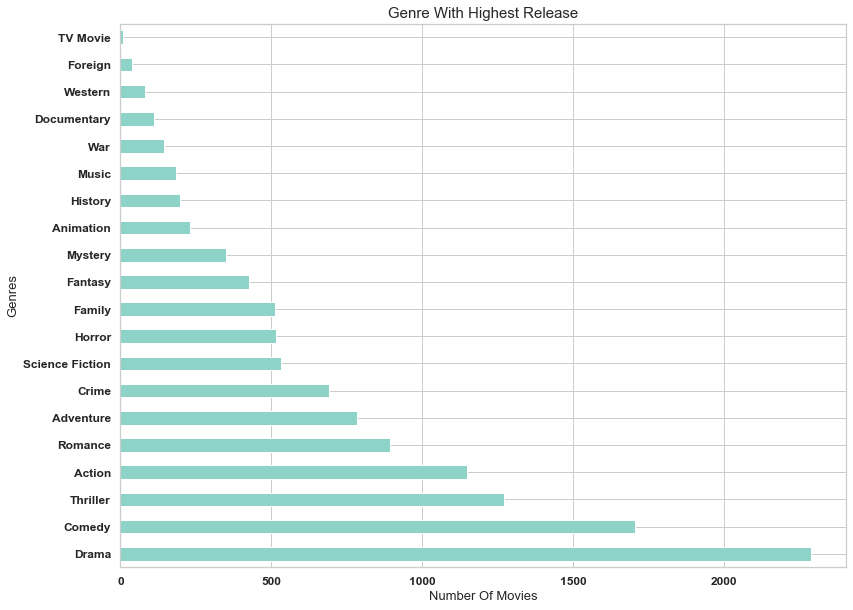

In [209]:
total_genre_movies = count_genres('genres_y')

total_genre_movies.plot(kind = 'barh' , figsize = (13 , 10) , fontsize = 12 , colormap = 'Set3')


#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

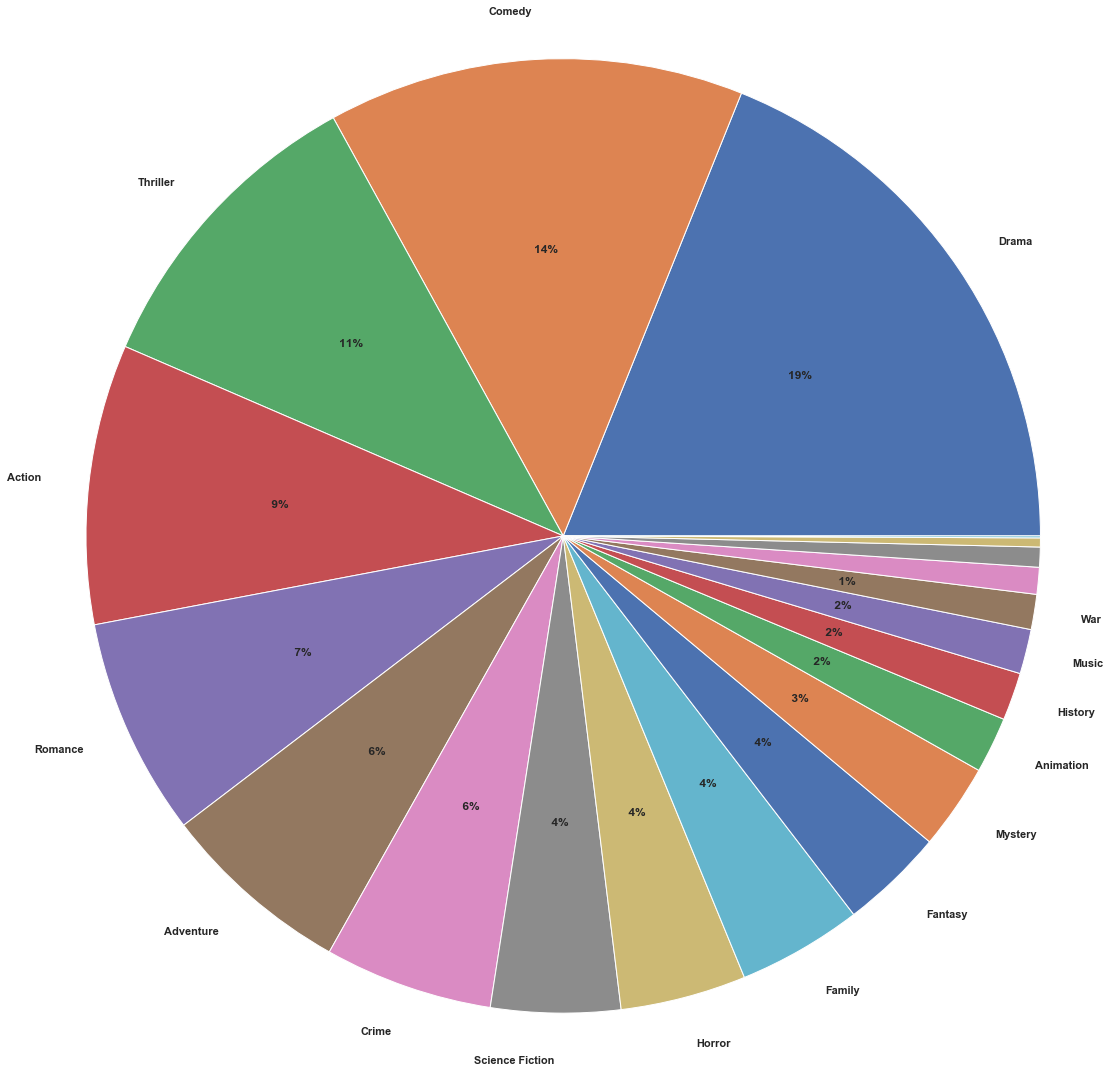

In [210]:
i = 0
genre_count = []
for genre in total_genre_movies.index:
    genre_count.append([genre , total_genre_movies[i]])
    i = i + 1


plt.rc('font' , weight = 'bold')
f , ax = plt.subplots(figsize = (15 , 15))
genre_count.sort(key = lambda x:x[1] , reverse = True)
labels , sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n , v in genre_count]
ax.pie(sizes , labels = labels_selected , autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '' , shadow = False , startangle = 0)
ax.axis('equal')
plt.tight_layout()

In [162]:
'''def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

words = dict()
for s in genre_count:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()'''

'def random_color_func(word=None, font_size=None, position=None,\n                      orientation=None, font_path=None, random_state=None):\n    h = int(360.0 * tone / 255.0)\n    s = int(100.0 * 255.0 / 255.0)\n    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)\n    return "hsl({}, {}%, {}%)".format(h, s, l)\n\nwords = dict()\nfor s in genre_count:\n    words[s[0]] = s[1]\ntone = 100 # define the color of the words\nf, ax = plt.subplots(figsize=(14, 6))\nwordcloud = WordCloud(width=550,height=300, background_color=\'black\', \n                      max_words=1628,relative_scaling=0.7,\n                      color_func = random_color_func,\n                      normalize_plurals=False)\nwordcloud.generate_from_frequencies(words)\nplt.imshow(wordcloud, interpolation="bilinear")\nplt.axis(\'off\')\nplt.show()'

### Most popular GENRE year to year

In [211]:
dataset.isnull().sum()

budget                   0
id                       0
keywords                 0
original_language        0
original_title           0
overview                 3
popularity               0
production_companies     0
release_date             1
revenue                  0
runtime                  2
spoken_languages         0
vote_average             0
vote_count               0
cast                     0
crew                     0
genres_y                27
year                     1
dtype: int64

In [212]:
dataset = dataset.dropna()

In [213]:
dataset.shape

(4747, 18)

In [215]:
dataset['year'] = new_dataset['year'].replace(np.NAN , 0);

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [217]:
np.unique(dataset['year'])

array([1916., 1925., 1927., 1929., 1930., 1932., 1933., 1934., 1935.,
       1936., 1937., 1938., 1939., 1940., 1941., 1942., 1944., 1945.,
       1946., 1947., 1948., 1949., 1950., 1951., 1952., 1953., 1954.,
       1955., 1956., 1957., 1958., 1959., 1960., 1961., 1962., 1963.,
       1964., 1965., 1966., 1967., 1968., 1969., 1970., 1971., 1972.,
       1973., 1974., 1975., 1976., 1977., 1978., 1979., 1980., 1981.,
       1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990.,
       1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
       2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.])

In [220]:
genre_details = list(map(str,(dataset['genres_y'])))
genre = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family','nan', 'Animation','War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']

#make the numpy array of year and popularity which contain all the rows of release_year and popularity column. 
year = np.array(dataset['year'])
popularity = np.array(dataset['popularity'])

#make a null dataframe which indexs are genres and columns are years.
popularity_df = pd.DataFrame(index = genre, columns = range(1916, 2018))
#change all the values of the dataframe from NAN to zero.
popularity_df = popularity_df.fillna(value = 0.0)


z = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    popularity_df.loc[split_genre, year[z]] = popularity_df.loc[split_genre, year[z]] + popularity[z]
    z+=1

In [221]:
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()

,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Adventure,-0.223607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.408248,...,1.026770,1.330010,1.328954,0.854584,1.180457,0.939290,1.778823,2.225015,2.302542,-0.408248
Science Fiction,-0.223607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.408248,...,0.116920,0.808150,0.038780,0.428010,0.431810,0.624531,1.324522,1.089549,0.509905,-0.408248
Fantasy,-0.223607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.408248,...,0.028050,0.338506,0.175495,0.051617,0.559922,0.088110,-0.065470,-0.530582,0.499922,-0.408248
Crime,-0.223607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.408248,...,0.400229,-0.269433,-0.106118,-0.022646,0.078648,0.677320,-0.249689,-0.277980,-0.280161,-0.408248
Western,-0.223607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.408248,...,-0.979139,-1.157458,-0.914239,-0.938406,-0.881078,-0.942028,-0.876858,-0.774603,-0.845990,-0.408248


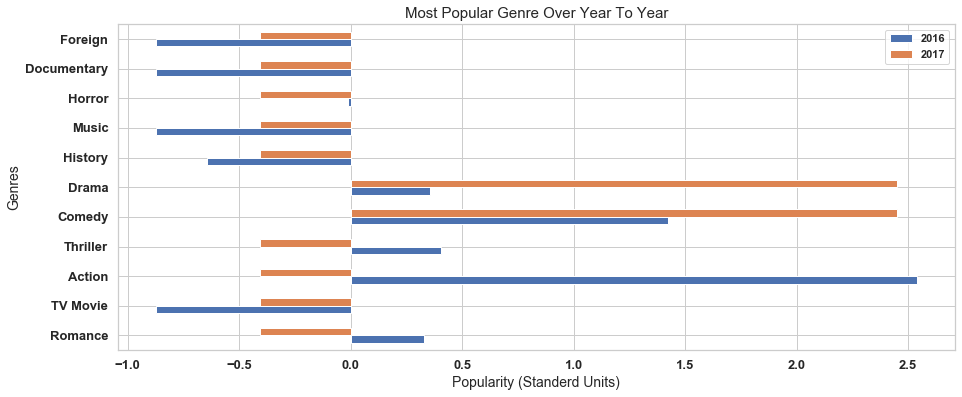

In [225]:
popular_genre.iloc[10:,100:].plot(kind='barh',figsize = (15,6) , fontsize=13)

#setup the title and labels of the plot.
plt.title("Most Popular Genre Over Year To Year",fontsize=15)
plt.xlabel("Popularity (Standerd Units)",fontsize=14)
plt.ylabel("Genres",fontsize = 14)
sns.set_style("whitegrid")

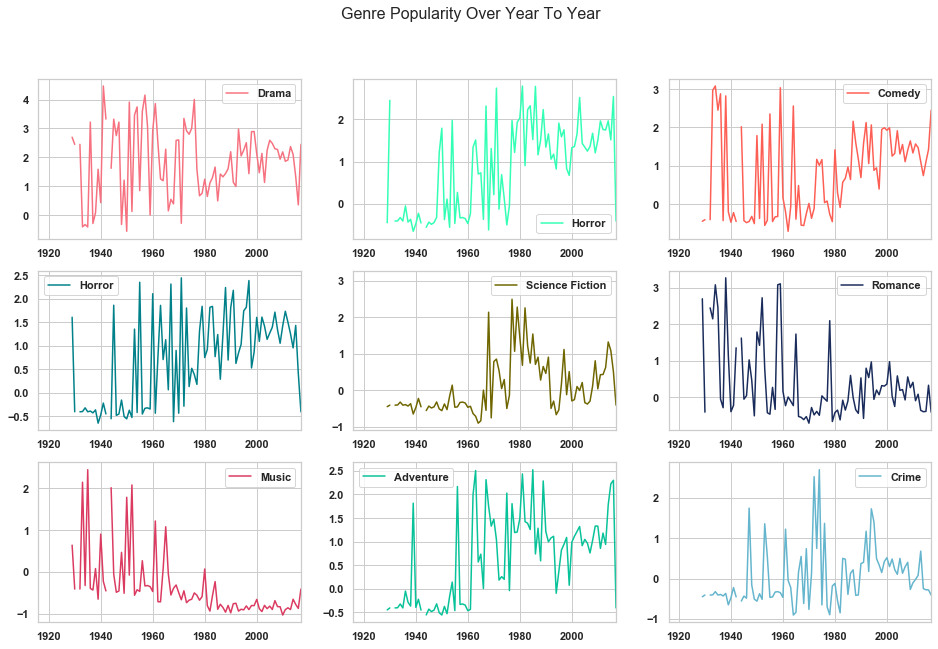

In [226]:
sns.set_style("whitegrid")
#make a subplot of size 3,3.
fig, ax = plt.subplots(3,3,figsize = (16,10))

#set the title of the subplot.
fig.suptitle('Genre Popularity Over Year To Year',fontsize = 16)

#plot the 'Drama' genre plot see the popularity difference over year to year.
popular_genre.loc['Drama'].plot(label = "Drama",color = '#f67280',ax = ax[0][0],legend=True)

#plot the 'Action' genre plot see the popularity difference over year to year.
popular_genre.loc['Action'].plot(label = "Horror",color='#33FFB5',ax = ax[0][1],legend=True)

#plot the 'Comedy' genre plot see the popularity difference over year to year.
popular_genre.loc['Comedy'].plot(label = "Comedy",color='#fe5f55',ax = ax[0][2],legend=True)

#accordig to the previous plot the 'Thriller','Science Fiction', 'Romance', 'Music','Adventure' and 'Crime'.
popular_genre.loc['Thriller'].plot(label = "Horror",color='#00818a',ax = ax[1][0],legend=True)
popular_genre.loc['Science Fiction'].plot(label = "Science Fiction",color='#6f6600',ax = ax[1][1],legend=True)
popular_genre.loc['Romance'].plot(label = "Romance",color='#1a2c5b',ax = ax[1][2],legend=True)
popular_genre.loc['Music'].plot(label = "Music",color='#db3b61',ax = ax[2][0],legend=True)
popular_genre.loc['Adventure'].plot(label = "Adventure",color='#08c299',ax = ax[2][1],legend=True)
popular_genre.loc['Crime'].plot(label = "Crime",color='c',ax = ax[2][2],legend=True)

### Production companies with higher release.

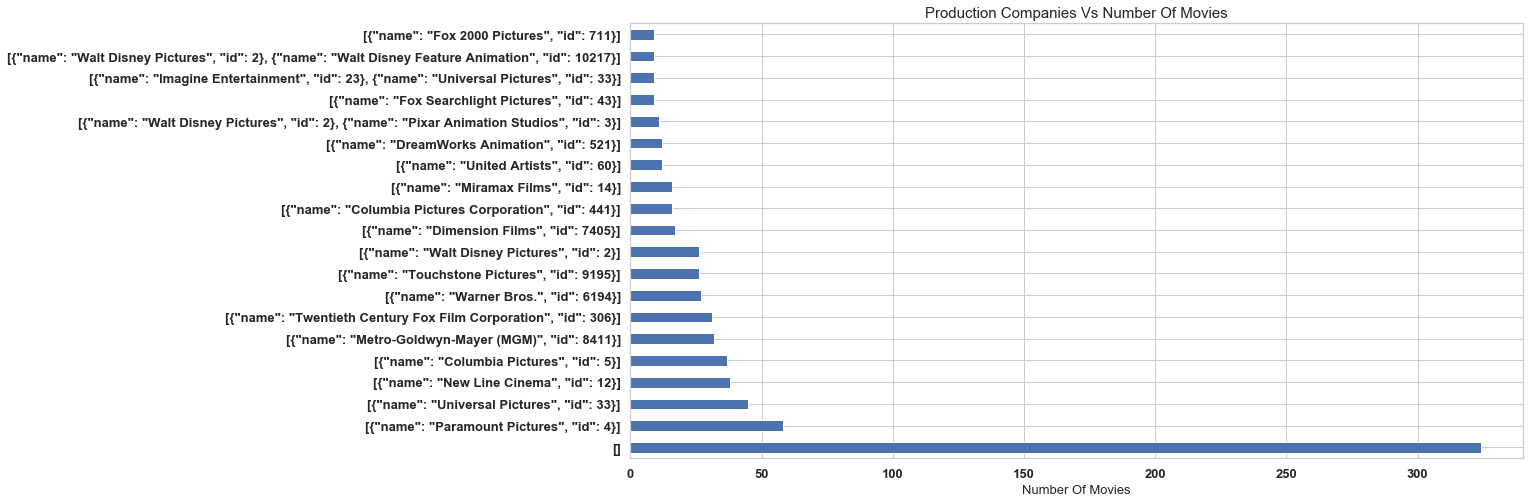

In [227]:
#it wiil count number of movies released by each production company.
production_companies = count_genres('production_companies')

#plot he barh plot.
production_companies.iloc[:20].plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("Production Companies Vs Number Of Movies",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
sns.set_style("whitegrid")

### What kinds of properties are associated with movies that have high revenues

In [229]:
info = pd.DataFrame(new_dataset['revenue'].sort_values(ascending=False))
data_set = ['id','popularity','budget','original_title','runtime','genres_y','vote_average','year']
for i in data_set:
    info[i] = new_dataset[i]
    
info.head(10)

,revenue,id,popularity,budget,original_title,runtime,genres_y,vote_average,year
0,2787965087,19995,150.437577,237000000,Avatar,162.0,Action|Adventure|Fantasy|Science Fiction,7.2,2009.0
25,1845034188,597,100.025899,200000000,Titanic,194.0,Drama|Romance|Thriller,7.5,1997.0
16,1519557910,24428,144.448633,220000000,The Avengers,143.0,Science Fiction|Action|Adventure,7.4,2012.0
28,1513528810,135397,418.708552,150000000,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,6.5,2015.0
44,1506249360,168259,102.322217,190000000,Furious 7,137.0,Action,7.3,2015.0
7,1405403694,99861,134.279229,280000000,Avengers: Age of Ultron,141.0,Action|Adventure|Science Fiction,7.3,2015.0
123,1274219009,109445,165.125366,150000000,Frozen,102.0,Animation|Adventure|Family,7.3,2013.0
31,1215439994,68721,77.682080,200000000,Iron Man 3,130.0,Action|Adventure|Science Fiction,6.8,2013.0
542,1156730962,211672,875.581305,74000000,Minions,91.0,Family|Animation|Adventure|Comedy,6.4,2015.0
26,1153304495,271110,198.372395,250000000,Captain America: Civil War,147.0,Adventure|Action|Science Fiction,7.1,2016.0


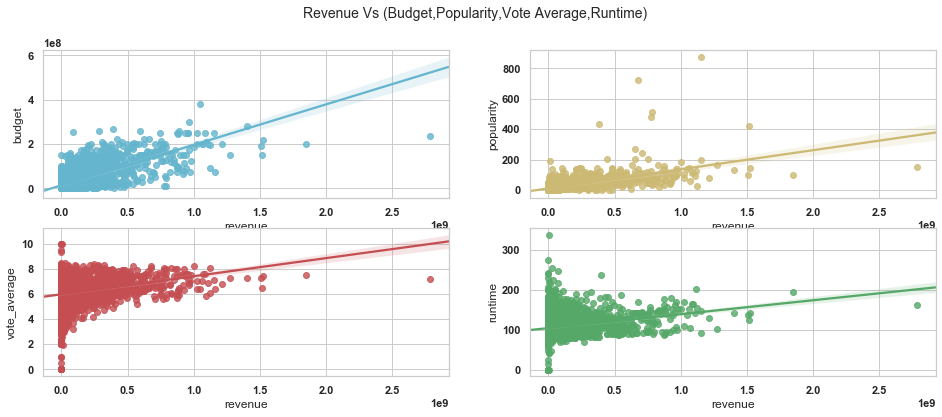

In [232]:
fig, axes = plt.subplots(2,2,figsize = (16,6))
fig.suptitle("Revenue Vs (Budget,Popularity,Vote Average,Runtime)",fontsize=14)
#info.plot(x = ['revenue'],y = ['budget'],kind = "scatter",ax = axes[0][0])
sns.regplot(x=new_dataset['revenue'], y=new_dataset['budget'],color='c',ax=axes[0][0])
sns.regplot(x=dataset['revenue'], y=dataset['popularity'],color='y',ax=axes[0][1])
sns.regplot(x=new_dataset['revenue'], y=new_dataset['vote_average'],color='r',ax=axes[1][0])
sns.regplot(x=new_dataset['revenue'], y=new_dataset['runtime'],color='g',ax=axes[1][1])
#axes.scatter(info['revenue'],info['vote_average'])
sns.set_style("whitegrid")

In [233]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = 'terrain_r',square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

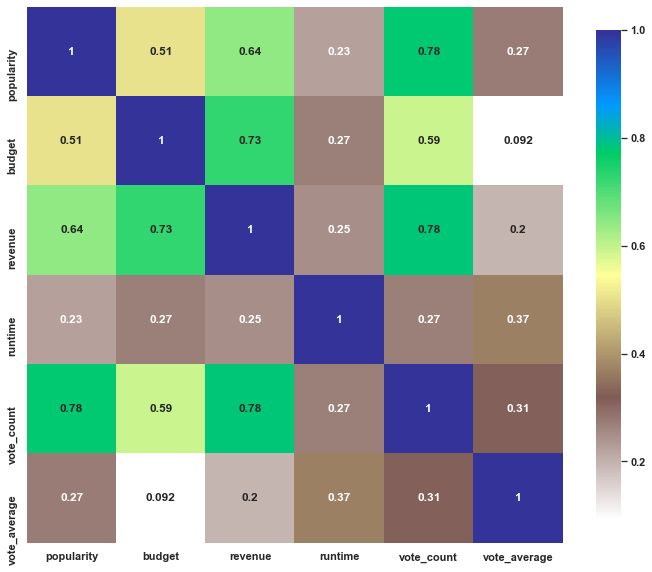

In [234]:
plot_correlation_map(new_dataset[['popularity','budget','revenue','runtime','vote_count','vote_average']])

This the some visualization with different condition.It is not hundred percent correct.Different observation dataset have different graph and prediction with respect to their various data.

Now it's time to Make a simple recommendation system using WEIGHTED-AVERAGE and CONTENT-BASED.

## Recommendation System

In [252]:
recomn_df = new_dataset

In [253]:
recomn_df.head()

,budget,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,cast,crew,genres_y,year
0,237000000,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Action|Adventure|Fantasy|Science Fiction,2009.0
1,300000000,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Adventure|Fantasy|Action,2007.0
2,245000000,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Action|Adventure|Crime,2015.0
3,250000000,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Action|Crime|Drama|Thriller,2012.0
4,260000000,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Action|Adventure|Science Fiction,2012.0


In [254]:
recomn_df.shape

(4777, 18)

In [255]:
recomn_df = recomn_df.dropna()

In [256]:
recomn_df.shape

(4747, 18)

In [257]:
recomn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 4776
Data columns (total 18 columns):
budget                  4747 non-null int64
id                      4747 non-null int64
keywords                4747 non-null object
original_language       4747 non-null object
original_title          4747 non-null object
overview                4747 non-null object
popularity              4747 non-null float64
production_companies    4747 non-null object
release_date            4747 non-null datetime64[ns]
revenue                 4747 non-null int64
runtime                 4747 non-null float64
spoken_languages        4747 non-null object
vote_average            4747 non-null float64
vote_count              4747 non-null int64
cast                    4747 non-null object
crew                    4747 non-null object
genres_y                4747 non-null object
year                    4747 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(9)
memory usage: 70

### Using Weighted average for each movie's Average Rating

In [258]:
v = recomn_df['vote_count']
R = recomn_df['vote_average']
C = recomn_df['vote_average'].mean()
m = recomn_df['vote_count'].quantile(0.70)

In [259]:
recomn_df['weighted_average'] = ((R*v)+ (C*m))/(v+m)

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


                                            w = ((R*v)+ (C*m))/(v+m)

w = weighted rating

R = Average for the movie 0 to 10(mean)

v = Number of vote per movie

C = The vote accross with whole report.
 
m = Minimum vote required for listed.


This is the formula of finding the weighted average.


In [260]:
recomn_df['weighted_average'].head()

0    7.148916
1    6.809906
2    6.278497
3    7.510673
4    6.102914
Name: weighted_average, dtype: float64

In [261]:
recomn_df.head()

,budget,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,cast,crew,genres_y,year,weighted_average
0,237000000,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Action|Adventure|Fantasy|Science Fiction,2009.0,7.148916
1,300000000,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Adventure|Fantasy|Action,2007.0,6.809906
2,245000000,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Action|Adventure|Crime,2015.0,6.278497
3,250000000,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Action|Crime|Drama|Thriller,2012.0,7.510673
4,260000000,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Action|Adventure|Science Fiction,2012.0,6.102914


In [262]:
recomn_df['popularity'].astype(str)

0                 150.437577
1                 139.082615
2         107.37678799999999
3                  112.31295
4                  43.926995
5         115.69981399999999
6                  48.681969
7         134.27922900000002
8                  98.885637
9                 155.790452
10                 57.925623
11        107.92881100000001
12        145.84737900000002
13                 49.046956
14                 99.398009
15                 53.978602
16                144.448633
17                135.413856
18                 52.035179
19        120.96574299999999
20                 89.866276
21                 37.668301
22                 94.370564
23                 42.990906
24        61.226009999999995
25                100.025899
26        198.37239499999998
27                 64.928382
28                418.708552
29                 93.004993
                ...         
4746                1.330379
4747               19.748658
4748    0.027811000000000002
4749          

In [263]:
#Sort the weighted average 
sort_ranking = recomn_df.sort_values('weighted_average' , ascending = False)
sort_ranking[['original_title' , 'vote_count' , 'vote_average' , 'weighted_average' , 'popularity']].head(10)

,original_title,vote_count,vote_average,weighted_average,popularity
1867,The Shawshank Redemption,8205,8.5,8.341884,136.747729
3316,The Godfather,5893,8.4,8.194420,143.659698
656,Fight Club,9413,8.3,8.172643,146.757391
3212,Pulp Fiction,8428,8.3,8.158721,121.463076
65,The Dark Knight,12002,8.2,8.103472,187.322927
802,Forrest Gump,7927,8.2,8.057245,138.133331
1805,Schindler's List,4329,8.3,8.040806,104.469351
3842,Whiplash,4254,8.3,8.036786,192.528841
95,Inception,13752,8.1,8.019318,167.583710
2277,千と千尋の神隠し,3840,8.3,8.012145,118.968562


C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23563 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31070 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\matplotlib\backends\backend_

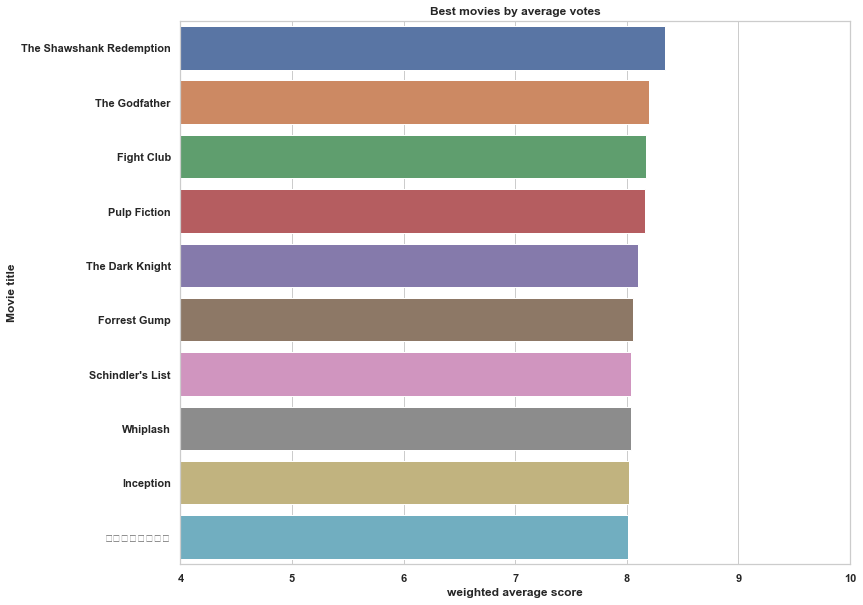

In [284]:
weight_average = sort_ranking.sort_values('weighted_average' , ascending = False);

plt.figure(figsize = (12,10))
axis1 = sns.barplot(x = weight_average['weighted_average'].head(10) , y = weight_average['original_title'].head(10) , data = weight_average)
plt.xlim(4 , 10);
plt.title('Best movies by average votes' , weight = 'bold')
plt.xlabel('weighted average score' , weight = 'bold')
plt.ylabel('Movie title' , weight = 'bold')
plt.savefig('best_movies.png');

In [265]:
recomn_df.isnull().sum()

budget                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
vote_average            0
vote_count              0
cast                    0
crew                    0
genres_y                0
year                    0
weighted_average        0
dtype: int64

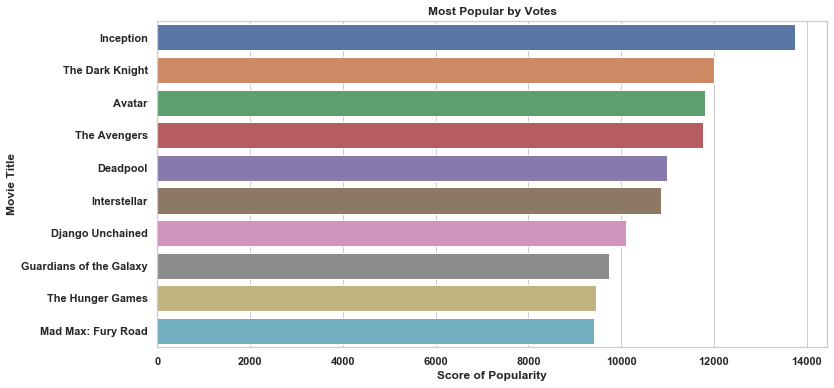

In [266]:
vote_movie = sort_ranking.sort_values('vote_count' , ascending=False)

plt.figure(figsize=(12,6))
ax=sns.barplot(x = vote_movie['vote_count'].head(10), y = vote_movie['original_title'].head(10), data=vote_movie)

plt.title('Most Popular by Votes', weight='bold')
plt.xlabel('Score of Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_popular_movies.png')

In [277]:
scaling = MinMaxScaler()
movie_scaled_df = scaling.fit_transform(recomn_df[['weighted_average','popularity']])
movie_normalized_df = pd.DataFrame(recomn_df , columns=['weighted_average','popularity'])
movie_normalized_df.head()

,weighted_average,popularity
0,7.148916,150.437577
1,6.809906,139.082615
2,6.278497,107.376788
3,7.510673,112.312950
4,6.102914,43.926995


In [279]:
recomn_df[['normalized_weight_average','normalized_popularity']] =  movie_normalized_df;

In [281]:
recomn_df['score'] = recomn_df['normalized_weight_average'] * 0.5 + recomn_df['normalized_popularity'] * 0.5
recomn_df = recomn_df.sort_values(['score'], ascending=False)
recomn_df[['original_title', 'normalized_weight_average', 'normalized_popularity', 'score']].head(10);

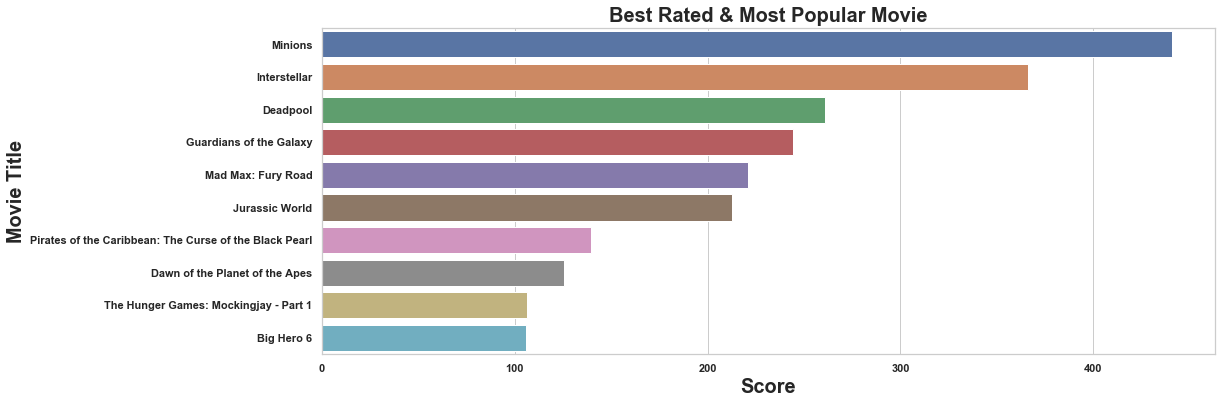

In [283]:
scored_df = recomn_df.sort_values('score', ascending=False)

plt.figure(figsize=(16,6))
ax = sns.barplot(x=scored_df['score'].head(10), y=scored_df['original_title'].head(10), data=scored_df, palette='deep')

plt.title('Best Rated & Most Popular Movie', weight='bold' , fontsize = 20)
plt.xlabel('Score', weight='bold' , fontsize = 20)
plt.ylabel('Movie Title', weight='bold' , fontsize = 20);

## Content Based.

In [285]:
cb = dataset

In [286]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 4776
Data columns (total 18 columns):
budget                  4747 non-null int64
id                      4747 non-null int64
keywords                4747 non-null object
original_language       4747 non-null object
original_title          4747 non-null object
overview                4747 non-null object
popularity              4747 non-null float64
production_companies    4747 non-null object
release_date            4747 non-null datetime64[ns]
revenue                 4747 non-null int64
runtime                 4747 non-null float64
spoken_languages        4747 non-null object
vote_average            4747 non-null float64
vote_count              4747 non-null int64
cast                    4747 non-null object
crew                    4747 non-null object
genres_y                4747 non-null object
year                    4747 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(9)
memory usage: 70

In [287]:
cb.isnull().sum()

budget                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
vote_average            0
vote_count              0
cast                    0
crew                    0
genres_y                0
year                    0
dtype: int64

In [288]:
cb.head(2)['overview']

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
Name: overview, dtype: object

In [292]:
tf = TfidfVectorizer(min_df = 3 , max_features = None , strip_accents = 'unicode' , analyzer = 'word' , ngram_range = (1 , 3) , stop_words = 'english')
cb['overview'] = cb['overview'].fillna('');

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [293]:
tf_matrix = tf.fit_transform(cb['overview'])

In [294]:
tf_matrix

<4747x9819 sparse matrix of type '<class 'numpy.float64'>'
	with 119785 stored elements in Compressed Sparse Row format>

In [295]:
tf_matrix.shape

(4747, 9819)

In [296]:
sig = sigmoid_kernel(tf_matrix , tf_matrix)

In [297]:
sig

array([[0.76163692, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
        0.76159416],
       [0.76159416, 0.76163692, 0.76159416, ..., 0.76159416, 0.76159521,
        0.76159416],
       [0.76159416, 0.76159416, 0.76163692, ..., 0.76159416, 0.76159485,
        0.76159416],
       ...,
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76163692, 0.76159416,
        0.76159416],
       [0.76159416, 0.76159521, 0.76159485, ..., 0.76159416, 0.76163692,
        0.76159447],
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159447,
        0.76163692]])

In [298]:
# This is mainly show the related value with index 20
sig[20]

array([0.76159416, 0.76159447, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [299]:
indices = pd.Series(dataset.index , index = dataset['original_title']).drop_duplicates()

In [301]:
indices

original_title
Avatar                                            0
Pirates of the Caribbean: At World's End          1
Spectre                                           2
The Dark Knight Rises                             3
John Carter                                       4
Spider-Man 3                                      5
Tangled                                           6
Avengers: Age of Ultron                           7
Harry Potter and the Half-Blood Prince            8
Batman v Superman: Dawn of Justice                9
Superman Returns                                 10
Quantum of Solace                                11
Pirates of the Caribbean: Dead Man's Chest       12
The Lone Ranger                                  13
Man of Steel                                     14
The Chronicles of Narnia: Prince Caspian         15
The Avengers                                     16
Pirates of the Caribbean: On Stranger Tides      17
Men in Black 3                                   

In [310]:
indices['Battleship']

27

In [312]:
sig[27]

array([0.76159629, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159438,
       0.7615947 ])

In [313]:
list(enumerate(sig[indices['Battleship']]))

[(0, 0.7615962927875388),
 (1, 0.7615941559557649),
 (2, 0.7615941559557649),
 (3, 0.7615941559557649),
 (4, 0.7615968115686235),
 (5, 0.7615954656423349),
 (6, 0.7615941559557649),
 (7, 0.7615948293388277),
 (8, 0.7615941559557649),
 (9, 0.7615954175497592),
 (10, 0.7615948500290038),
 (11, 0.7615941559557649),
 (12, 0.7615956194214416),
 (13, 0.7615941559557649),
 (14, 0.7615968121868103),
 (15, 0.7615941559557649),
 (16, 0.761595376703024),
 (17, 0.7615941559557649),
 (18, 0.7615956421520513),
 (19, 0.761595360215677),
 (20, 0.7615946659699433),
 (21, 0.7615948188279977),
 (22, 0.7615941559557649),
 (23, 0.7615941559557649),
 (24, 0.7615941559557649),
 (25, 0.7615941559557649),
 (26, 0.7615944443712651),
 (27, 0.761636924238491),
 (28, 0.7615953774311458),
 (29, 0.761594365071163),
 (30, 0.7615941559557649),
 (31, 0.7615945606375644),
 (32, 0.7615943675390382),
 (33, 0.7615941559557649),
 (34, 0.7615941559557649),
 (35, 0.7615941559557649),
 (36, 0.7615948708897582),
 (37, 0.7615941

In [314]:
sorted(list(enumerate(sig[indices['Battleship']])) , key = lambda x : x[1] , reverse = True)

[(27, 0.761636924238491),
 (4155, 0.7616053468121814),
 (3623, 0.7616015906394077),
 (1262, 0.7616004865890881),
 (535, 0.7616002053097393),
 (1696, 0.7616001561315963),
 (1428, 0.7615996569793873),
 (1945, 0.7615989245887679),
 (2745, 0.7615987029892813),
 (2139, 0.761598630786252),
 (1053, 0.7615983187487066),
 (2947, 0.7615982255178388),
 (1778, 0.761598178108735),
 (1208, 0.7615981323430432),
 (1204, 0.7615979927883983),
 (2072, 0.7615979847219215),
 (3632, 0.7615978675746122),
 (266, 0.7615978607839783),
 (1559, 0.7615978436463202),
 (1445, 0.7615978384459653),
 (503, 0.7615978310230438),
 (74, 0.761597824054276),
 (1189, 0.7615978131488241),
 (3137, 0.7615978085751854),
 (965, 0.7615977926375094),
 (3404, 0.7615977595789512),
 (628, 0.7615976678316173),
 (1722, 0.7615976486223506),
 (1316, 0.7615976154441695),
 (577, 0.7615976071335507),
 (90, 0.7615976025152166),
 (1026, 0.7615975658371267),
 (56, 0.7615975584180936),
 (1900, 0.7615975444619435),
 (4399, 0.7615975257912276),
 (4

In [315]:
def give_recommendation(title , sig = sig):
    idx = indices[title]
    
    sig_score = list(enumerate(sig[idx]))
    sig_score = sorted(list(enumerate(sig[idx])) , key = lambda x : x[1] , reverse = True)
    
    sig_score = sig_score[1:11]
    
    movie_indices = [i[0] for i in sig_score]
    
    return dataset['original_title'].iloc[movie_indices]

In [317]:
give_recommendation('The Golden Compass')

2764                     The Call
197             The Da Vinci Code
964               The Story of Us
3227          That Awkward Moment
142                           Pan
3333    Michael Jordan to the Max
1899                    Draft Day
820                City of Angels
2100            The Jungle Book 2
2455     Vicky Cristina Barcelona
Name: original_title, dtype: object

#### This is a very simple Recommendation system based on content based and weighted average.That all for this project.